In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv(r"C:\Users\Arigala.Adarsh\Downloads\names\yob2022.txt",names=['Name','Sex','Birth']) 


In [3]:
data.head()

,Name,Sex,Birth
0,Olivia,F,16573
1,Emma,F,14435
2,Charlotte,F,12891
3,Amelia,F,12333
4,Sophia,F,12310


In [4]:
data.groupby('Sex').Birth.sum()

Sex
F    1628730
M    1733166
Name: Birth, dtype: int64

In [5]:
years=range(1880,2022)
array=[]
columns=['Name','Sex','Birth']
for year in years:
    path=r"C:\Users\Arigala.Adarsh\Downloads\names\yob%d.txt" %year
    dataset=pd.read_csv(path,names=columns)
    dataset['year']=year
    array.append(dataset)
new_dataset=pd.concat(array,ignore_index=True)
new_dataset

,Name,Sex,Birth,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2053238,Zyeire,M,5,2021
2053239,Zyel,M,5,2021
2053240,Zyian,M,5,2021
2053241,Zylar,M,5,2021


In [6]:
 new_dataset.head()

,Name,Sex,Birth,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [7]:
#finding total birth of male and female in each year
total_birth=new_dataset.pivot_table('Birth',index='year',columns='Sex' ,aggfunc=sum)

In [8]:
total_birth.head()

Sex,F,M
year,,
1880,90994,110490
1881,91953,100737
1882,107847,113686
1883,112320,104625
1884,129019,114442


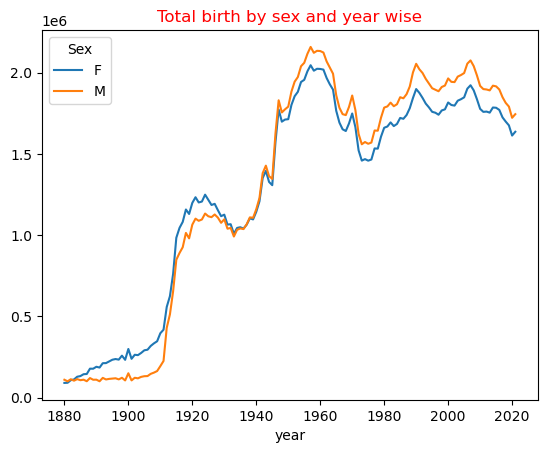

In [9]:
total_birth.plot( )
plt.title("Total birth by sex and year wise",color='red')
plt.show()

In [10]:
#counting the no of names and sex according to Birth
Count_sex=new_dataset.groupby('Sex').count().reset_index()
Count_sex


,Sex,Name,Birth,year
0,F,1210135,1210135,1210135
1,M,843108,843108,843108


C:\Users\Arigala.Adarsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


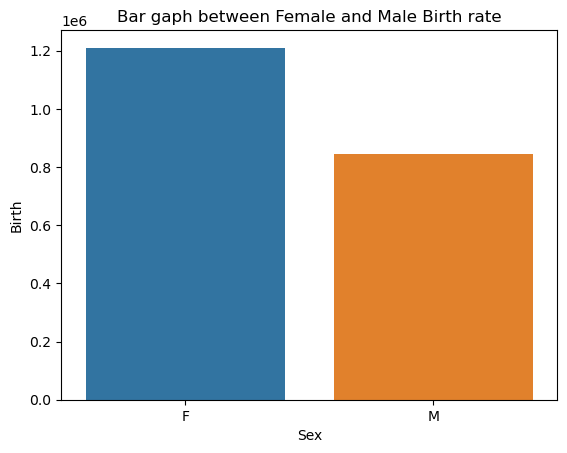

In [11]:
a=Count_sex['Sex']
b=Count_sex['Birth']
sns.barplot(a,b)
plt.title("Bar gaph between Female and Male Birth rate")
plt.show()

In [12]:
def popularnamefunc(Popular_name):
    Popular_name['name_percentage']=((Popular_name.Birth/Popular_name.Birth.sum())*100)
    return Popular_name
    
new_dataset=new_dataset.groupby(['year','Sex']).apply(popularnamefunc)
new_dataset

,Name,Sex,Birth,year,name_percentage
0,Mary,F,7065,1880,7.764248
1,Anna,F,2604,1880,2.861727
2,Emma,F,2003,1880,2.201244
3,Elizabeth,F,1939,1880,2.130910
4,Minnie,F,1746,1880,1.918808
...,...,...,...,...,...
2053238,Zyeire,M,5,2021,0.000287
2053239,Zyel,M,5,2021,0.000287
2053240,Zyian,M,5,2021,0.000287
2053241,Zylar,M,5,2021,0.000287


In [13]:
#grouping popular data according to year
groupby_year=new_dataset.groupby('year').count().reset_index()
groupby_year

,year,Name,Sex,Birth,name_percentage
0,1880,2000,2000,2000,2000
1,1881,1934,1934,1934,1934
2,1882,2127,2127,2127,2127
3,1883,2084,2084,2084,2084
4,1884,2297,2297,2297,2297
...,...,...,...,...,...
137,2017,32670,32670,32670,32670
138,2018,32221,32221,32221,32221
139,2019,32109,32109,32109,32109
140,2020,31517,31517,31517,31517


In [ ]:
#ploting bar graph between the year birth rate
a=groupby_year['year']
b=groupby_year['Birth']
sns.barplot(a,b)
plt.title('Total Birth rate in each year')
plt.xticks(rotation=90)
plt.show()

In [41]:
def top_name(name_percentage):
    return name_percentage.sort_values(by='Birth',ascending=False)
p_name=new_dataset.groupby(['Sex','Birth'])

top_names=p_name.apply(top_name)
top_names.reset_index(inplace=True,drop=True) 


In [42]:
top_names.head()

,Name,Sex,Birth,year,name_percentage
0,Adelle,F,5,1880,0.005495
1,Shondrea,F,5,2000,0.000275
2,Shontelle,F,5,2000,0.000275
3,Shulamis,F,5,2000,0.000275
4,Shulamit,F,5,2000,0.000275


In [ ]:
boy_name = top_names[top_names.Sex == 'M']
girl_name = top_names[top_names.Sex == 'F']
total_birth = top_names.pivot_table('Birth', index = 'year', columns = 'Name', aggfunc = sum)

In [ ]:
boy_name.head(150)

In [ ]:
girl_name.head()

In [ ]:
girl_name=pd.DataFrame(girl_name)

In [ ]:
a=Count['Birth'].head(20)
b=Count['Sex'].head(20)
plt.bar(a,b)
plt.title('Count According to birth')
plt.show()